<a href="https://colab.research.google.com/github/cdavis94-school/s23-CS167-Notes/blob/main/Notebook5_Davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Thursday, April 6th, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter changed** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the data and try out your best model on your smaller dataset
5. Answer the conclusion questions


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)

<Axes: >

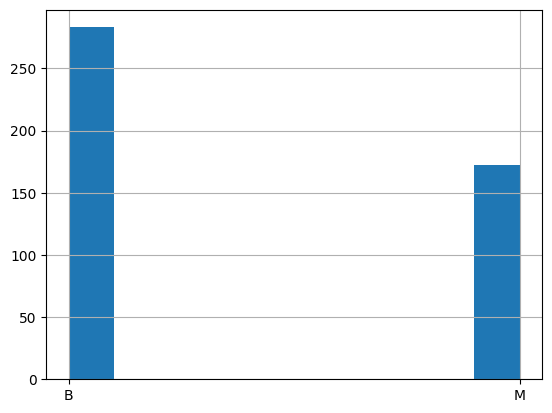

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product

In [5]:
#Default SVC
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


In [9]:
#Tuned SVC:
clf = SVC(kernel = 'linear')
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.9912280701754386
     Pred M  Pred B
T M      39       1
T B       0      74


2. Perceptron: \\
  a. Default \\
  b. Tuned

In [15]:
#Default Perceptron
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

#output accuracy
print("Prediction accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))

Prediction accuracy: 0.9824561403508771


In [22]:
#Tuned Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

#output accuracy
print("Prediction accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))

Prediction accuracy: 0.9824561403508771


3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default SGD


In [ ]:
#Tuned SGD

3. Now, run a PCA on your data and pass this data into the model from above that worked the best. 

In [ ]:
# reduce the dimensionality of your data by using a PCA with n_components = 3


# use this smaller dataset and run the model that performed the best from above 


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?